In [37]:
import pandas as pd

#Loading the dataset 
dataset=pd.read_csv('medical_cost.csv')
null_values = dataset.isnull().sum().sort_values(ascending=False)

print(null_values)
dataset

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64


,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49
...,...,...,...,...,...,...,...
9995,24,female,26.9,2,yes,southeast,16551.53
9996,49,female,33.4,3,no,northeast,6376.05
9997,52,female,38.1,5,yes,northwest,18760.27
9998,24,male,33.4,4,no,northwest,5471.91


In [38]:
#Prompting for the target value
target_column = input("Please enter the name of the target column: ")
if target_column not in dataset.columns:
    print(f"Error: {target_column} is not a valid column in the dataset.")
else:
    target = dataset[target_column]
    features = dataset.drop(columns=[target_column])

print(target)
print(features)

Please enter the name of the target column:  Medical Cost


0       17907.54
1       16312.64
2        6819.21
3        5247.87
4       17525.49
          ...   
9995    16551.53
9996     6376.05
9997    18760.27
9998     5471.91
9999     4952.24
Name: Medical Cost, Length: 10000, dtype: float64
      Age     Sex   BMI  Children Smoker     Region
0      58    male  15.6         2    yes  northwest
1      24    male  29.8         0    yes  northeast
2      50    male  29.0         5     no  northwest
3      35    male  34.0         1     no  southeast
4      31  female  17.6         3    yes  southeast
...   ...     ...   ...       ...    ...        ...
9995   24  female  26.9         2    yes  southeast
9996   49  female  33.4         3     no  northeast
9997   52  female  38.1         5    yes  northwest
9998   24    male  33.4         4     no  northwest
9999   24  female  21.7         5     no  southwest

[10000 rows x 6 columns]


In [39]:
#Converting the string values in numerical values
if target.dtype == 'object':  
    target = pd.get_dummies(target)

for column in features.columns:
    if features[column].dtype == 'object':
        string_to_num = pd.get_dummies(features[column])
        
        # Replacing the original categorical column with the dummy variables
        features = features.drop(column, axis=1).join(string_to_num)

print(target.astype(int))
print(features.astype(int))

0       17907
1       16312
2        6819
3        5247
4       17525
        ...  
9995    16551
9996     6376
9997    18760
9998     5471
9999     4952
Name: Medical Cost, Length: 10000, dtype: int64
      Age  BMI  Children  female  male  no  yes  northeast  northwest  \
0      58   15         2       0     1   0    1          0          1   
1      24   29         0       0     1   0    1          1          0   
2      50   29         5       0     1   1    0          0          1   
3      35   34         1       0     1   1    0          0          0   
4      31   17         3       1     0   0    1          0          0   
...   ...  ...       ...     ...   ...  ..  ...        ...        ...   
9995   24   26         2       1     0   0    1          0          0   
9996   49   33         3       1     0   1    0          1          0   
9997   52   38         5       1     0   0    1          0          1   
9998   24   33         4       0     1   1    0          0          

In [40]:
#Scalling the features to the range [0,1]
from sklearn.preprocessing import MinMaxScaler
from joblib import dump

feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features.astype(float))

#Saving the scaler
dump(feature_scaler, 'scaler.joblib') 

print(features_scaled)

[[0.85106383 0.024      0.4        ... 1.         0.         0.        ]
 [0.12765957 0.592      0.         ... 0.         0.         0.        ]
 [0.68085106 0.56       1.         ... 1.         0.         0.        ]
 ...
 [0.72340426 0.924      1.         ... 1.         0.         0.        ]
 [0.12765957 0.736      0.8        ... 1.         0.         0.        ]
 [0.12765957 0.268      1.         ... 0.         0.         1.        ]]


Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 11897.5439 - val_loss: 11948.2070
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11955.6943 - val_loss: 11909.3086
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11009.7412 - val_loss: 5844.7104
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5633.3027 - val_loss: 4986.1831
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4647.0098 - val_loss: 3309.4255
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2985.7224 - val_loss: 1816.0493
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1345.8241 - val_loss: 252.5624
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 257.6350 - val_loss: 242.8341
Epoch 9/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 257.4067 - val_loss: 243.4802
Epoch 10/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 255.1811 - val_loss: 243.4199
Epoch 11/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 255.8282 - val_loss:

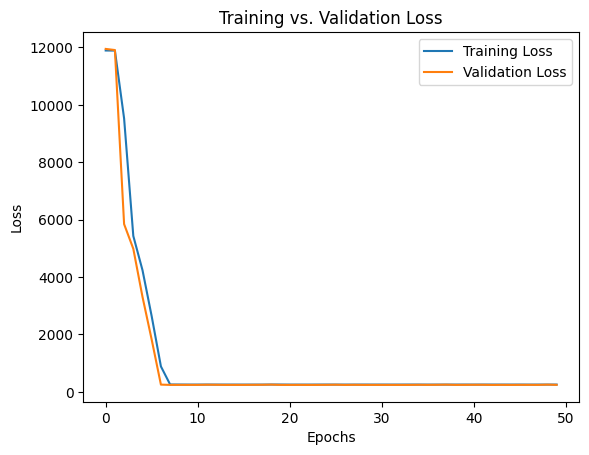

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Neural Network R-squared = 99.77%
Model saved as 'Best_NeuralNetwork.keras'


In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#Splitting dataset into training and testing sets, allocating 10% for testing the model. 
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.1, random_state=0)

# Neural Network Model Architecture
model = Sequential([
    Dense(16, activation="relu"),  # Hidden layer 1 (16 neuron)
    Dense(8, activation="relu"),  # Hidden layer 2 (8 neuron)
    Dense(4, activation="relu"),  # Hidden layer 3 (4 neuron)
    Dense(2, activation="relu"),  # Hidden layer 4 (2 neuron)
    
    Dense(1),  # Output layer (1 neuron)
])

#Configuring the model for training by specifying the optimizer and the loss function
model.compile(optimizer="adam",loss="mae")

# Training the Model
history = model.fit(  
    X_train, y_train,
    epochs=50, #The model will reapet training 50 times.        
    batch_size=32, #Model looks at 32 pieces at a time, calculates the error, adjusts its internal settings, and moves on to the next 32 pieces
    validation_split=0.1, #10% of data is used to check how well model is performing
    verbose=1, #Display progress information during training
)

# Plot training vs. validation loss to detect overfitting. 
#If  the training loss keeps decreasing while the validation loss starts increasing or stays constant it is a sign of overfitting.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

#The model makes predictions using the test data (X_test), 
#Calculates how well the predictions match the actual results (y_test) using the R-squared score.
predictions = model.predict(X_test).flatten()
NN_r2 = r2_score(y_test, predictions) * 100

# Printing Results
print(f"Neural Network R-squared = {NN_r2:.2f}%")

# Save the trained model
model.save("Best_NeuralNetwork.keras")
print("Model saved as 'Best_NeuralNetwork.keras'")

In [42]:
import joblib
import pandas as pd
from tensorflow.keras.models import load_model

#Making predictions using a pre-trained neural network model.
# Load trained model
model = load_model("Best_NeuralNetwork.keras")

#  Load the correct scaler
scaler = joblib.load("scaler.joblib")

# Define input data
input_data = {
    "Age":[58],
    "BMI":[15.6],
    "Children":[2],
    "female":[0],
    "male":[1],
    "no":[0],
    "yes":[1],
    "northeast":[0],
    "northwest":[1],
    "southeast":[0],
    "southwest":[0],
}

# Convert to DataFrame
new_features = pd.DataFrame(input_data)
new_features_scaled = scaler.transform(new_features)
prediction_scaled = model.predict(new_features_scaled, verbose=0)

print(f"Predicted value: {prediction_scaled[0][0]:.2f}")


Predicted value: 18246.77
